# Aykırı Gözlem Analizi
## Aykırı Değerleri Yakalamak

In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# table isimli değişken üzerinde çalışacağız.
df_table = df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

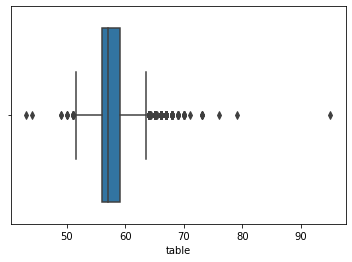

In [5]:
# boxplot grafiğindeki 2 düz çizgi alt ve üst eşik değeri ifade ediyor. Bu çizgilerin dışındaki siyah noktalar ise aykırı gözlemleri ifade ediyor.
sns.boxplot(x=df_table);

## Eşik Değer Hesaplaması

In [6]:
# Q1 ve Q3 kartillerini belirliyoruz. Eşik değerleri bu kartiller belirler.
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1 # inter quartile

In [7]:
Q1

56.0

In [8]:
Q3

59.0

In [9]:
IQR

3.0

In [10]:
# Alt sınır ve üst sınırı bu denklemi kurarak belirliyoruz. Bu sınırlar bizim eşik değerimizi oluşturuyor. Bu sınırların dışındaki veriler aykırı gözlem olarak kabul ediliyor.
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [11]:
alt_sinir

51.5

In [12]:
ust_sinir

63.5

## ----------------------------------------------------------------

## Aykırı Gözlem Tespiti

In [13]:
# Bulduğumuz alt ve üst sınırlar çerçevesinde veri setindeki aykırı gözlemleri tespit ediyoruz.
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [14]:
aykiri_tf = (df_table < alt_sinir)

In [15]:
df_table[aykiri_tf]
## Alt sınırın altındaki değerleri yani aykırı değerleri index numaraları ile fancy index methodunu kullanarak yakaladık.

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

# Aykırı Değer Problemini Çözmek

## Silme

In [16]:
import pandas as pd

In [17]:
type(df_table)

pandas.core.series.Series

In [18]:
df_table = pd.DataFrame(df_table)
# Series to DataFrame

In [19]:
df_table.shape

(53940, 1)

In [20]:
t_df = df_table[ ~ (( df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis=1)]
# tilda (~) işareti kendisinden sonra gelen sorgunun dışındaki elemanları listelemek için kullanılır.

In [21]:
t_df
# aykırı değerlerden arındırılmış veri seti.

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [22]:
t_df.shape
## Yaklaşık 600 adet aykırı gözlemi silmiş olduk.

(53335, 1)

# Ortalama İle Doldurma

In [23]:
import seaborn as sns
import pandas as pd

In [24]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


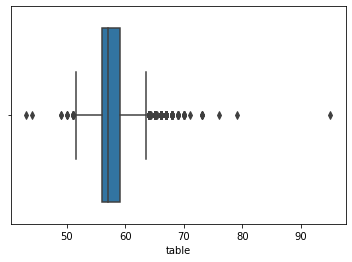

In [25]:
sns.boxplot(x=df.table);

In [26]:
df_table = df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [27]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [28]:
df_table.mean()

57.45718390804603

In [29]:
df_table[aykiri_tf] = df_table.mean()

C:\Users\murat\AppData\Local\Temp\ipykernel_16424\3741757661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [30]:
df_table.mean()

57.45950528258309

In [31]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

# Baskılama Yöntemi

### Baskılama yönteminde aykırı gözlemler, eğer üst sınırdaysa üst sınır eşik değerine eşitlenir, alt sınırda ise alt sınır eşik değerine eşitlenir.

In [32]:
import seaborn as sns
import pandas as pd

In [33]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [34]:
df_table = df['table']

In [35]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [36]:
df_table[aykiri_tf] = alt_sinir

C:\Users\murat\AppData\Local\Temp\ipykernel_16424\3246625175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [37]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

# -------------------------------------------------------------------------